In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import descent
from ipywidgets import interact

plt.style.use(['ocean', 'seaborn-notebook'])
from functools import partial
%matplotlib inline

## Load our noisy estimate of a cell's spatiotemporal receptive field (RF)

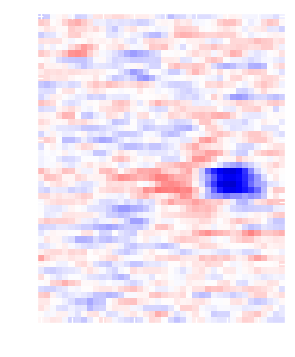

In [2]:
rf = np.loadtxt('data/cell7.csv', delimiter=',')

# helper function to visualize the receptive field
def image(x):
    plt.imshow(x, cmap='seismic', vmin=-0.5, vmax=0.5, filternorm=1., interpolation='none')
    
# try it
image(rf)

## Denoising

In [10]:
opt = descent.Consensus()
opt.add('squared_error', rf)
opt.add('sparse', 0.02)
opt.add('nucnorm', 0.5)
res = opt.minimize(rf, maxiter=500)

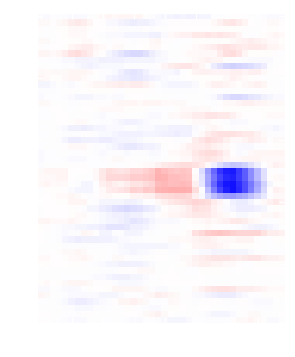

In [11]:
image(res.x)